Import the neccessary libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Data Loading

In [119]:
try:
    df = pd.read_csv("coin_Cosmos.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The 'coin_Cosmos.csv was not found. Please ensure it is in same directory")
    exit()
df

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.000000e+00
1,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.000000e+00
2,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.000000e+00
3,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.000000e+00
4,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
840,841,Cosmos,ATOM,2021-07-02 23:59:59,11.764925,10.543935,11.048080,11.764925,1.891418e+08,2.559039e+09
841,842,Cosmos,ATOM,2021-07-03 23:59:59,12.198276,11.540298,11.791034,11.817927,1.551317e+08,2.571184e+09
842,843,Cosmos,ATOM,2021-07-04 23:59:59,12.433965,11.520693,11.799601,12.263548,1.449177e+08,2.668775e+09
843,844,Cosmos,ATOM,2021-07-05 23:59:59,13.968271,11.955753,12.320437,13.548475,4.489358e+08,2.949102e+09


Data Preprocessing

In [120]:
# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)

# Convert the "date" column to datetime object
df['date'] = pd.to_datetime(df['date'])
print(df.info())

# Extract the numerical features from the "date" to help the model learn
df["dayofyear"] = df["date"].dt.dayofyear
df["weekofyear"] = df["date"].dt.isocalendar().week.astype(int)
print(df.info())

# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   serial_number  845 non-null    int64         
 1   name           845 non-null    object        
 2   symbol         845 non-null    object        
 3   date           845 non-null    datetime64[ns]
 4   high           845 non-null    float64       
 5   low            845 non-null    float64       
 6   open           845 non-null    float64       
 7   close          845 non-null    float64       
 8   volume         845 non-null    float64       
 9   marketcap      845 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 66.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  ----

Feature Engineering

In [121]:
# Select features (X) and the target (y)
features = ["high","low","open","volume","dayofyear","weekofyear"]
target = "close"

X = df[features]
y = df[target]

Data Scaling

In [122]:
# Scale the features to ensure they have similar magnitude
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Splitting

In [123]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

Visualization Before Training

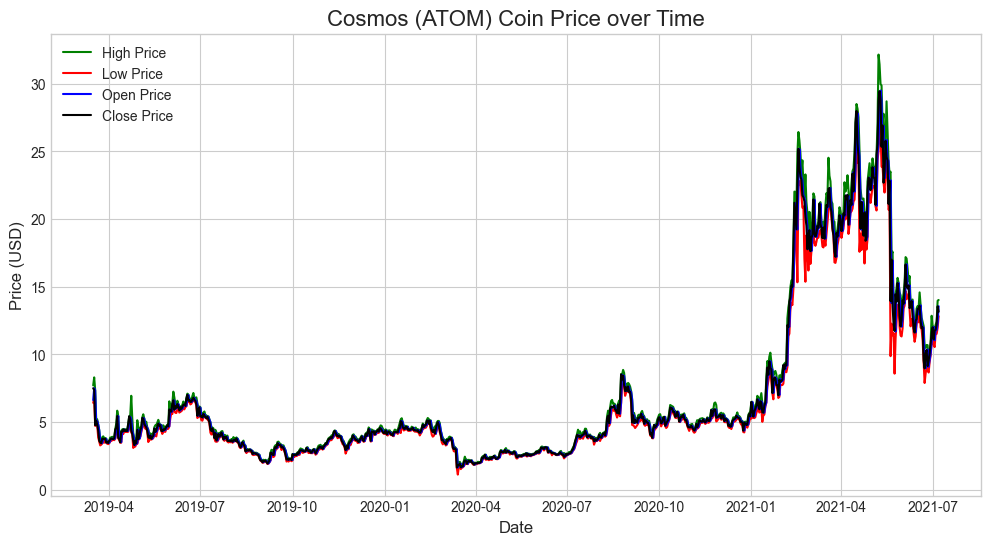

In [124]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,6))
# Plot "high", "low", "open", and "close" prices over time
plt.plot(df["date"],df["high"],label="High Price",color="green")
plt.plot(df["date"],df["low"],label="Low Price",color="red")
plt.plot(df["date"],df["open"],label="Open Price",color="blue")
plt.plot(df["date"],df["close"],label="Close Price",color="black")
plt.title("Cosmos (ATOM) Coin Price over Time",fontsize=16)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Price (USD)",fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

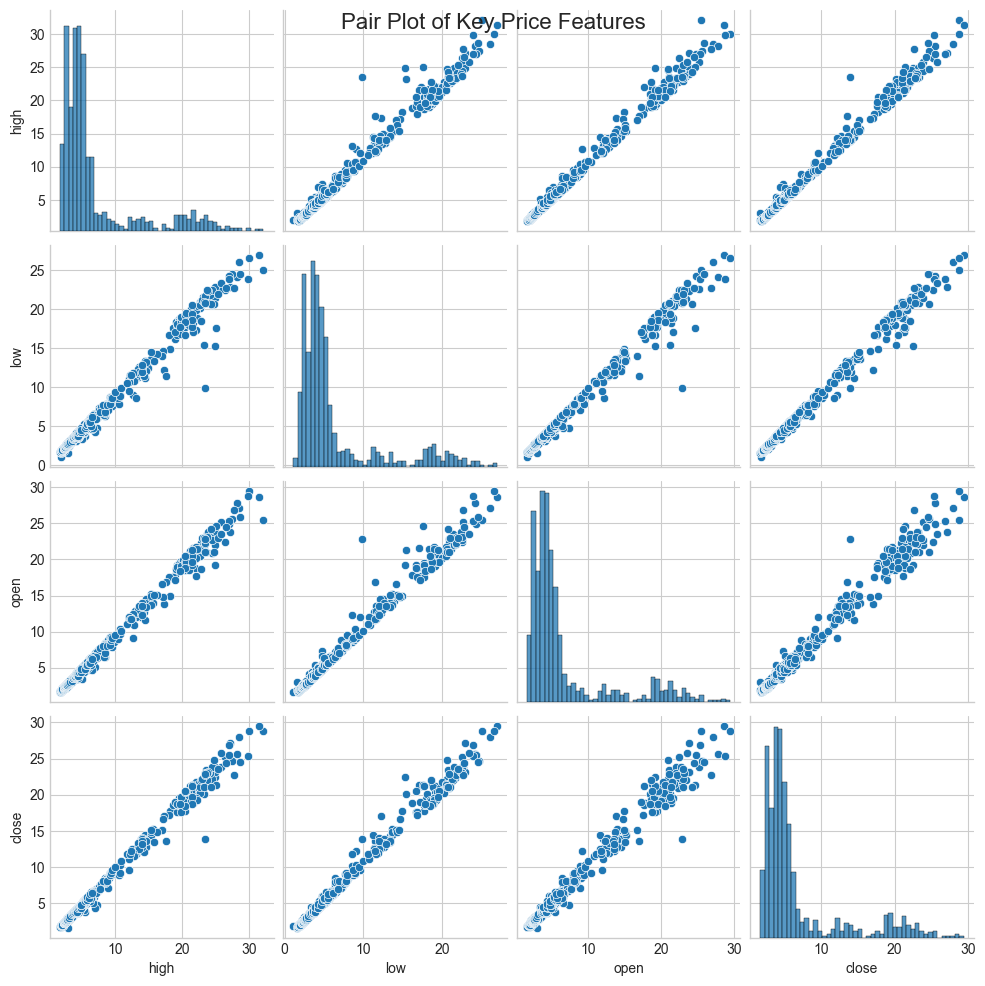

In [125]:
# Visualize the relationship between features and the target variable
plt.figure(figsize=(10,8))
sns.pairplot(df[["high","low","open","close"]])
plt.suptitle("Pair Plot of Key Price Features",fontsize=16)
plt.show()

Model Training

In [126]:
# Initialize and train four different regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

# ElasticNet Regression
elastic_reg = ElasticNet()
elastic_reg.fit(X_train,y_train)

# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train,y_train)

# Decision Tree Regression
dtr_reg = DecisionTreeRegressor()
dtr_reg.fit(X_train,y_train)

# Random Forest Regression
rfr_reg = RandomForestRegressor(n_estimators=100,random_state=42)
rfr_reg.fit(X_train,y_train)

# Gradient Boosting Regression
grb_reg = GradientBoostingRegressor(n_estimators=100,random_state=42)
grb_reg.fit(X_train,y_train)




# Make the predictions of the test set of each model
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_reg.predict(X_test)
y_pred_svr = svr_reg.predict(X_test)
y_pred_dtr = dtr_reg.predict(X_test)
y_pred_rfr = rfr_reg.predict(X_test)
y_pred_grb = grb_reg.predict(X_test)

Model Evaluation

In [127]:
# Linear Regression Metrics
print("-----Linear Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lin):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lin):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lin):.4f}")

# Ridge Regression Metrics
print("-----Ridge Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MAE: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MSE: {mean_absolute_error(y_test,y_pred_ridge):.4f}")

# Lasso Regression Metrics
print("-----Lasso Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lasso):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lasso):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lasso):.4f}")

# ElasticNet Regression Metrics
print("-----Elastic Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_elastic):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_elastic):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_elastic):.4f}")

# Support Vector Regression Metrics
print("-----Support Vector Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_svr):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_svr):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_svr):.4f}")

# Decision Tree Regression
print("-----Decision Tree Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_dtr):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_dtr):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_dtr):.4f}")


# Random Forest Regression
print("-----Random Forest Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_rfr):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_rfr):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_rfr):.4f}")

# Gradient Boosting Regression
print("-----Gradient Boosting Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_grb):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_grb):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_grb):.4f}")


-----Linear Regression-----
R-squared: 0.9979
MAE: 0.1571
MSE: 0.0764
-----Ridge Regression-----
R-squared: 0.9974
MAE: 0.9974
MSE: 0.1768
-----Lasso Regression-----
R-squared: 0.9648
MAE: 0.7689
MSE: 1.2886
-----Elastic Regression-----
R-squared: 0.9413
MAE: 0.9839
MSE: 2.1485
-----Support Vector Regression-----
R-squared: 0.9819
MAE: 0.3919
MSE: 0.6614
-----Decision Tree Regression-----
R-squared: 0.9868
MAE: 0.3628
MSE: 0.4830
-----Random Forest Regression-----
R-squared: 0.9946
MAE: 0.2390
MSE: 0.1961
-----Gradient Boosting Regression-----
R-squared: 0.9940
MAE: 0.2523
MSE: 0.2192


Determine the Best Model

In [128]:
# Determine the best model based on R-squared score (or other metrics)

r2_scores = {
    "Linear": r2_score(y_test,y_pred_lin),
    "Ridge": r2_score(y_test,y_pred_ridge),
    "Lasso": r2_score(y_test,y_pred_lasso),
    "ElasticNet": r2_score(y_test,y_pred_elastic),
    "SVR": r2_score(y_test,y_pred_svr),
    "Decison": r2_score(y_test,y_pred_dtr),
    "Random": r2_score(y_test,y_pred_rfr),
    "Gradient": r2_score(y_test,y_pred_grb)
}

best_model_name = max(r2_scores,key=r2_scores.get)
print(f"Conclusion: The best performing model is {best_model_name} Regression")

y_pred_best = y_pred_lin

Conclusion: The best performing model is Linear Regression


Visualization after training

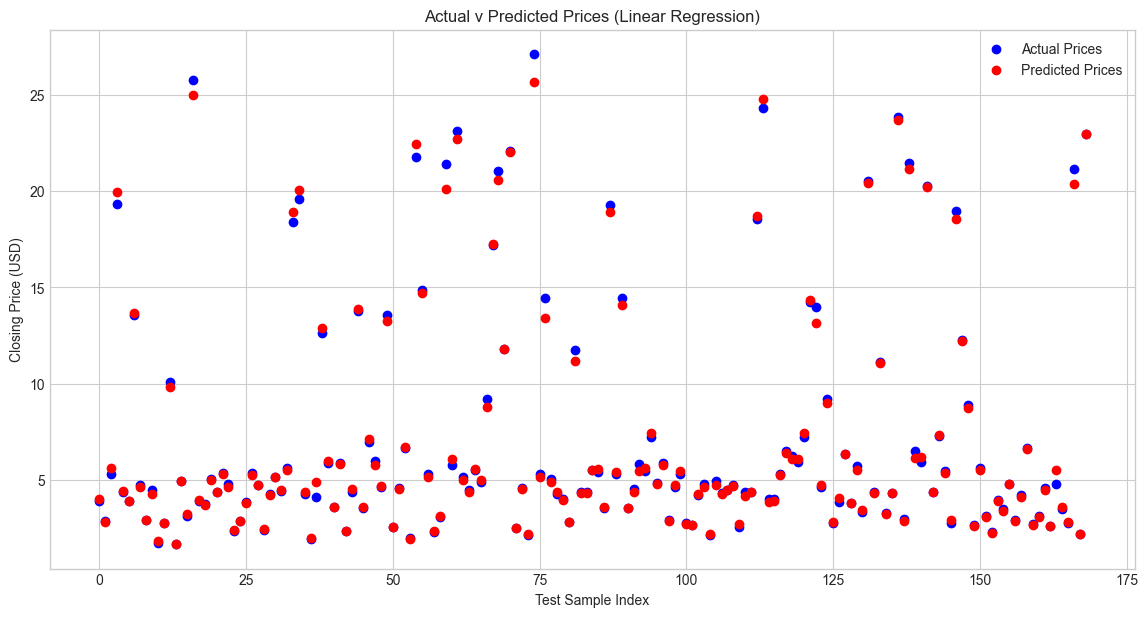

In [129]:
# Create a visualization to compare the actual values with the predictions from the best model
# This plot shows how closely the model's predictions align with real data
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)),y_test,color="blue",label="Actual Prices")
plt.scatter(range(len(y_pred_best)),y_pred_best,color="red",label="Predicted Prices")
plt.title(f"Actual v Predicted Prices ({best_model_name} Regression)")
plt.xlabel("Test Sample Index")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

User Input and Prediction

In [ ]:
print("----- Predict Cosmos Closing Price-----")
print("Enter the following data to predict the closing price")

try:
    # Prompt the user for the feature values
    high_price = float(input("Enter the High Price:"))
    low_price = float(input("Enter the Low Price:"))
    open_price = float(input("Enter the Open Price:"))
    volume = float(input("Enter the Volume:"))

    # Create a new DataFrame with user's input
    # The data must be in the same format as the training data
    new_data = pd.DataFrame([[high_price,low_price,open_price,volume]],columns=features)

    # Use the best-performing model to make a prediction on the new data
    predicted_price = lin_reg.predict(new_data)

    # Print the final predicted price
    print(f"Predicted Closing rice: ${predicted_price[0]:.2f}")
except ValueError:
    print("Invalid input. Please enter valid numerical values")
except Exception as e:
    print(f"An error occurred: {e}")

----- Predict Cosmos Closing Price-----
Enter the following data to predict the closing price
Invalid input. Please enter valid numerical values
